# Exam 

This is the practical exam for **Introduction to Python for Datascience**. Follow the below instructions to download the dataset you'll be working on. You're expected to answer all relevant questions within this notebook and email it to *bashar.dudin@epita.fr* with the following subject format *[IntroPyDS] epita_login* before exam deadline.

In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## The dataset

We'll be working with a dataset composed of pictures of a number of public figures. Our aim is to build up a classifier for corresponding figures.  

In [2]:
from sklearn.datasets import fetch_lfw_people

In [3]:
figures = fetch_lfw_people(min_faces_per_person=60)

Target names are stored in the key *target_names*, the target or labels are the ones in the key *target* and data can be found through the *data* key. An extra *image* key is there to store the images in the proper two-dimensional format. The data key gives a vectorized version of images. 

In [4]:
figures.target

array([1, 3, 3, ..., 7, 3, 5])

In [5]:
figures.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [6]:
figures.target[:10]

array([1, 3, 3, 3, 5, 3, 6, 3, 7, 0])

In [7]:
figures.data.shape

(1348, 2914)

In [8]:
figures.images.shape

(1348, 62, 47)

In [9]:
62*47

2914

We have $1348$ images of $62\times 47$ pixels. The following code enables you to have a look at part of these images.

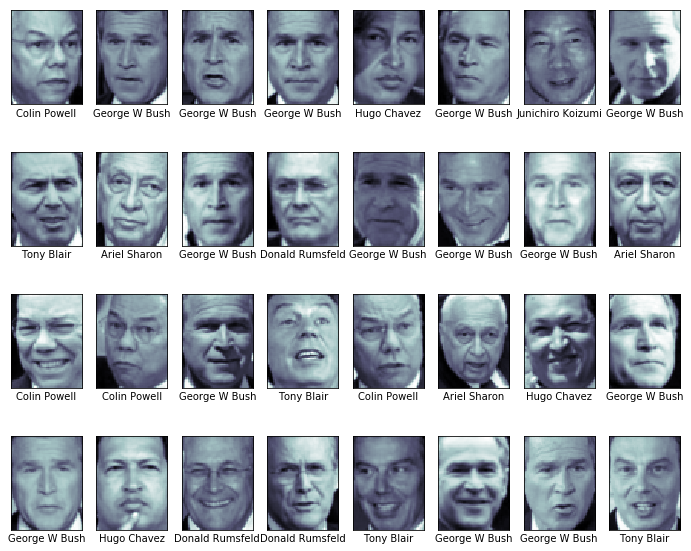

In [10]:
%matplotlib inline
fig, ax = plt.subplots(4, 8, figsize=(12, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(figures.images[i], cmap="bone")
    axi.set(xticks=[], yticks=[], xlabel=figures.target_names[figures.target[i]]) 

### 1. Write down a function that plots a single image from the previous dataset.

In [11]:
def show_image(index):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.imshow(figures.images[index], cmap="bone")
    ax.set(xticks=[], yticks=[], xlabel=figures.target_names[figures.target[index]])

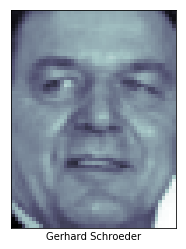

In [12]:
show_image(200)

In [13]:
X, y = figures.data, figures.target

# Modeling

### 2. Split your dataset into a test set and a training set. What do we need that for?

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In order to be able to evaluate model accuracy over all different targets.

### 3. Checking rows at equal position of `X` and `X_train` the same? How does `train_test_split` work?

In [19]:
y[200] == y_train[200]

False

## First (Too) Naive Models

### 4. What is the expected score for the constant model always returning a given same target?

For the constant model, and depending on the chosen target we get the following proportion for expected accuracy scores. 

In [20]:
dico = {}
for i in range(figures.target_names.shape[0]):
    dico[figures.target_names[i]] = np.sum(figures.target == i)/figures.target.shape[0]
dico

{'Ariel Sharon': 0.05712166172106825,
 'Colin Powell': 0.17507418397626112,
 'Donald Rumsfeld': 0.0897626112759644,
 'George W Bush': 0.39317507418397624,
 'Gerhard Schroeder': 0.08086053412462908,
 'Hugo Chavez': 0.052670623145400594,
 'Junichiro Koizumi': 0.04451038575667656,
 'Tony Blair': 0.10682492581602374}

In [21]:
from sklearn.base import BaseEstimator

In [22]:
np.array([1]*10).shape

(10,)

In [23]:
class cst_model(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X, target=1):
        return np.array([target]*X.shape[0])

In [24]:
cst_M = cst_model()

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test, cst_M.predict(X_test))

0.14444444444444443

### 5. Code down a random model following a discrete uniform law over the integer interval {0, ... , 7}. 

In [27]:
from numpy.random import randint 

In [28]:
randint(0, 7, 10)

array([4, 6, 2, 4, 5, 5, 5, 1, 6, 1])

In [29]:
class random_model(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X, target=1):
        return randint(0,7, size=X.shape[0])

### 6. Compute its accuracy score on the dataset.

In [30]:
rand_M = random_model()

In [31]:
accuracy_score(y_test, rand_M.predict(X_test))

0.1037037037037037

There is no fit with this model. It does not see any part of the dataset. It is sensful to compute the accuracy score over the whole dataset `X`.

### 7. In the specific case of previous (too) naive approaches discuss which one does better?

The expected value (mean value) for accuracy score of random model is $\frac{1}{7}$. There are two cases when the accuracy score in the constant model is higher all the others have a worse accuracy score. Remember though : **None of them is a good model, there is no correlation between input and output**.

# Naive Bayes Classifier

### 8. Train and evaluate a naive Bayes classifier.

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
NB_clf = GaussianNB()

In [34]:
NB_clf.fit(X_train, y_train)

GaussianNB(priors=None)

In [35]:
accuracy_score(y_test, NB_clf.predict(X_test))

0.4185185185185185

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
cross_val_score(NB_clf, X_train, y_train, cv=3)

array([0.41873278, 0.45833333, 0.46478873])

### 9. Compare this classifier to random one. 

The model we have at hand building up on the Naive Bayes strategy is apparently better than the previous random choice.

### 10. For which figures does the model have highest accuracy scores? 

*You might want to use the **confusion matrix**, though not needed.*

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
conf_m = confusion_matrix(y_test, NB_clf.predict(X_test))
conf_m

array([[ 7,  2,  1,  0,  1,  0,  0,  1],
       [ 2, 17,  2,  3,  0,  2,  7,  6],
       [ 5,  3, 12,  0,  0,  1,  0,  5],
       [ 2, 17,  8, 47,  2, 15, 14, 12],
       [ 0,  0,  1,  3,  1,  2,  0, 13],
       [ 0,  2,  0,  1,  0, 12,  1,  0],
       [ 0,  0,  0,  2,  0,  2,  4,  0],
       [ 2,  9,  2,  2,  0,  3,  1, 13]])

In [40]:
acc_prop = np.diag(conf_m) / np.sum(conf_m, axis=0)

In [41]:
accuracy_per_target = dict(zip(figures.target_names, acc_prop))
accuracy_per_target

{'Ariel Sharon': 0.3888888888888889,
 'Colin Powell': 0.34,
 'Donald Rumsfeld': 0.46153846153846156,
 'George W Bush': 0.8103448275862069,
 'Gerhard Schroeder': 0.25,
 'Hugo Chavez': 0.32432432432432434,
 'Junichiro Koizumi': 0.14814814814814814,
 'Tony Blair': 0.26}

In [42]:
conf_m_prop = conf_m / np.sum(conf_m, axis=0, keepdims=True)
conf_m_prop

array([[0.38888889, 0.04      , 0.03846154, 0.        , 0.25      ,
        0.        , 0.        , 0.02      ],
       [0.11111111, 0.34      , 0.07692308, 0.05172414, 0.        ,
        0.05405405, 0.25925926, 0.12      ],
       [0.27777778, 0.06      , 0.46153846, 0.        , 0.        ,
        0.02702703, 0.        , 0.1       ],
       [0.11111111, 0.34      , 0.30769231, 0.81034483, 0.5       ,
        0.40540541, 0.51851852, 0.24      ],
       [0.        , 0.        , 0.03846154, 0.05172414, 0.25      ,
        0.05405405, 0.        , 0.26      ],
       [0.        , 0.04      , 0.        , 0.01724138, 0.        ,
        0.32432432, 0.03703704, 0.        ],
       [0.        , 0.        , 0.        , 0.03448276, 0.        ,
        0.05405405, 0.14814815, 0.        ],
       [0.11111111, 0.18      , 0.07692308, 0.03448276, 0.        ,
        0.08108108, 0.03703704, 0.26      ]])

### 11. What is the model's error proportion in predicting highest scoring figures?

In [43]:
error_prop = 1 - acc_prop
error_prop

array([0.61111111, 0.66      , 0.53846154, 0.18965517, 0.75      ,
       0.67567568, 0.85185185, 0.74      ])

### 12. What is the confusion matrix about? Plot a heat map of the confusion matrix.

Per column you get the number of predictions of column index class as row index class.

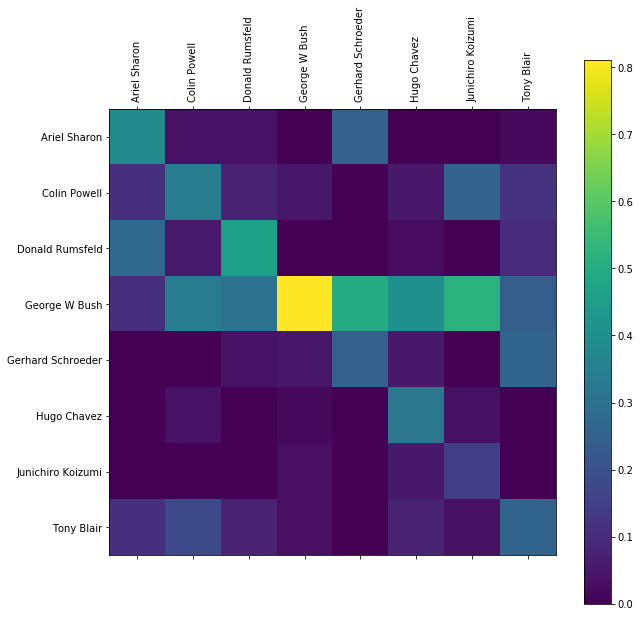

In [44]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 10))
heat_m = ax.matshow(conf_m_prop)
ax.set_yticks(np.arange(len(figures.target_names)))
ax.set_xticks(np.arange(len(figures.target_names)))
ax.set_yticklabels(figures.target_names)
ax.set_xticklabels(figures.target_names, rotation=90)
fig.colorbar(heat_m, )

Here we did a trick in order to properly plot the ticks labels, there should be a cleaner way of doing this.

In [45]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
import seaborn as sns

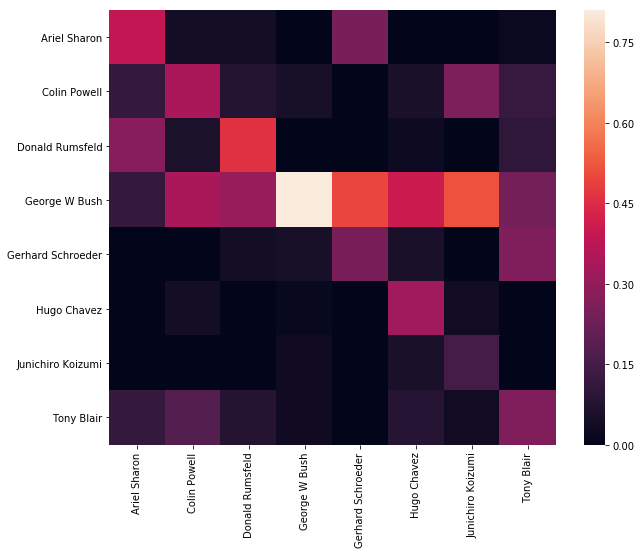

In [47]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_m_prop, ax=ax, xticklabels=figures.target_names, yticklabels=figures.target_names)

### 13. How can you get classification errors clearer?

In [48]:
np.fill_diagonal(conf_m_prop, 0)

In [49]:
conf_m_prop

array([[0.        , 0.04      , 0.03846154, 0.        , 0.25      ,
        0.        , 0.        , 0.02      ],
       [0.11111111, 0.        , 0.07692308, 0.05172414, 0.        ,
        0.05405405, 0.25925926, 0.12      ],
       [0.27777778, 0.06      , 0.        , 0.        , 0.        ,
        0.02702703, 0.        , 0.1       ],
       [0.11111111, 0.34      , 0.30769231, 0.        , 0.5       ,
        0.40540541, 0.51851852, 0.24      ],
       [0.        , 0.        , 0.03846154, 0.05172414, 0.        ,
        0.05405405, 0.        , 0.26      ],
       [0.        , 0.04      , 0.        , 0.01724138, 0.        ,
        0.        , 0.03703704, 0.        ],
       [0.        , 0.        , 0.        , 0.03448276, 0.        ,
        0.05405405, 0.        , 0.        ],
       [0.11111111, 0.18      , 0.07692308, 0.03448276, 0.        ,
        0.08108108, 0.03703704, 0.        ]])

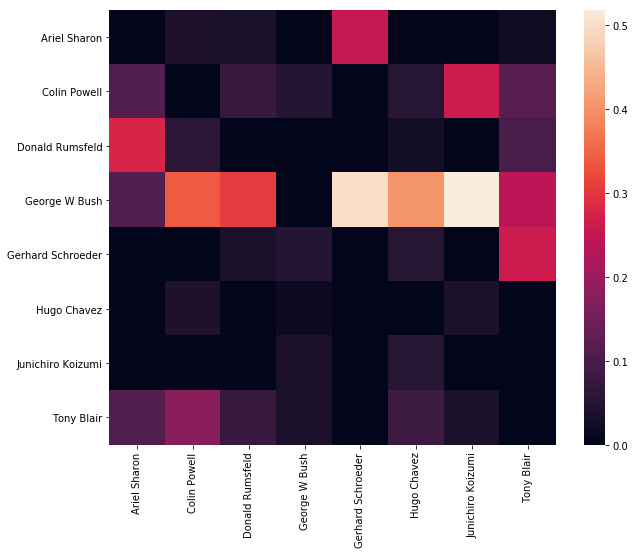

In [59]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_m_prop, ax=ax, xticklabels=figures.target_names, yticklabels=figures.target_names)

### Looking into things through learning curves

A learning curve is about plotting training and evaluation errors against the size of the training set.

In [74]:
def plot_learning_curve(model, X, y, metric=accuracy_score, min_size=0, max_size=None):
    """Plots learning curve of model against dataset X
    
    It assumes names accuracy_score, train_test_split and plt are within the 
    environment name space. Respectively standing for sklearn.metrics.accuracy_score
    sklearn.model_selection.train_test_split and matplotlib.pyplot.
    
    """
    # Splitting dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # Filling in vectors of errors against size of dataset
    train_errors, test_errors = [], []
    if not max_size:
        max_size = X_train.shape[0]
    for m in range(min_size, max_size):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(1 - metric(y_train_predict, y_train[:m]))
        test_errors.append(1 - metric(y_test_predict, y_test))
    sns.set_style("darkgrid")
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(train_errors, "r+-", label="train")
    ax.plot(test_errors, "b-", label="test")
    ax.set_ylim(0, 1)
    ax.legend()

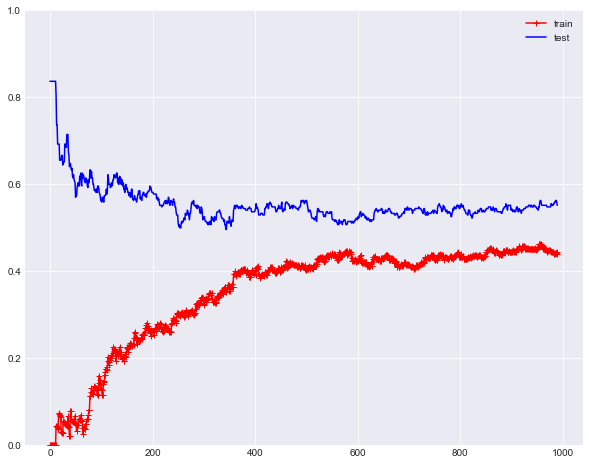

In [75]:
plot_learning_curve(NB_clf, X, y, min_size=10, max_size=1000)

## Training an SVM Classifier

The question now is to use a more sophisticated model. Called *Support Vector Machines*.

### 14. Look into the `sklearn` documentation for correponding class train and evaluate such a model.

*You'll be using the SVC with second proposed hyperparameter in the documentation for **kernel**.*

In [51]:
from sklearn.svm import SVC

In [52]:
svm_clf = SVC(kernel='poly')

In [53]:
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
cross_val_score(svm_clf, X_train, y_train)

array([0.79889807, 0.82777778, 0.85352113])

In [55]:
accuracy_score(y_test, svm_clf.predict(X_test))

0.8592592592592593

We can already see that our model has better accuracy than any previous model we tried training.

### 15. Plot again the confusion matrix of model. Are there any changes in the best fits?

In [56]:
svm_cfm = confusion_matrix(y_test, svm_clf.predict(X_test))
svm_cfm = svm_cfm / np.sum(svm_cfm, axis=0, keepdims=True) 

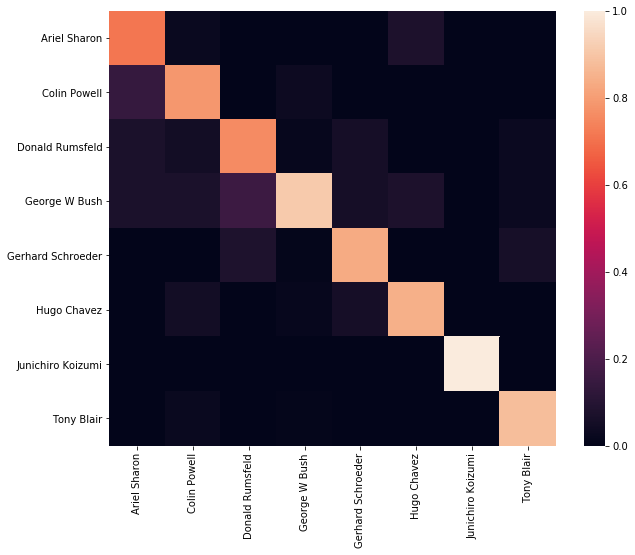

In [57]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(svm_cfm,
           xticklabels=figures.target_names,
           yticklabels=figures.target_names)

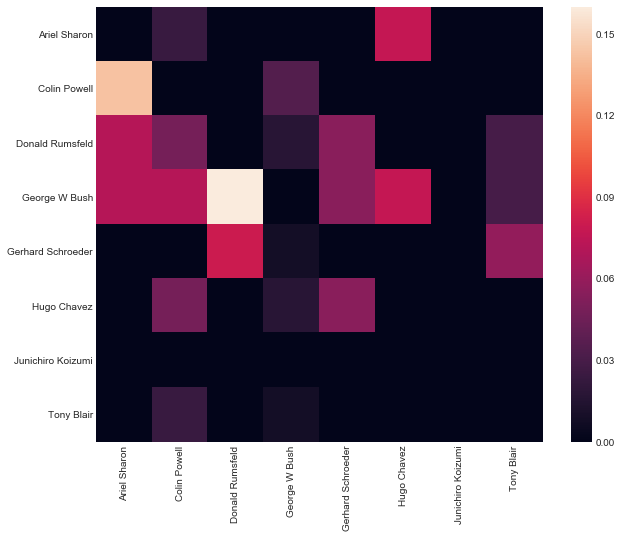

In [76]:
np.fill_diagonal(svm_cfm, 0)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(svm_cfm,
           xticklabels=figures.target_names,
           yticklabels=figures.target_names)

### Plotting the learning curve

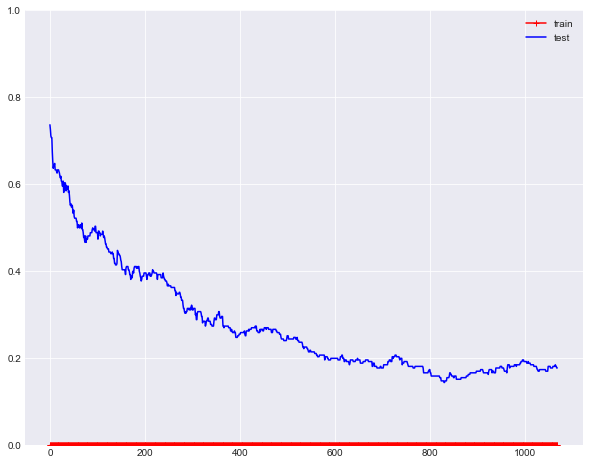

In [78]:
plot_learning_curve(svm_clf, X, y, min_size=10)

### 16. What are the resutls you get if you change kernel to `rbf`?

### 17. Time the time it takes to train previous SVM with best hyperparameter results.

# Reducing dimension

## 18. This prior to last question is voluntarily open : 

You are expected to transform your data using an unsupervised model reducing dimesionality to the first $150$ features. For this you are going to

    - Read proper documentation about pipelines in sklearn ; *make_pipeline*.
    - Create a pipeline that reduces dimesion using `PCA` limiting output to first $150$ components.
    - Train and evaluate that model.
    - Compare time gain and accuracy loss to previous model.

### 19. Explain with your own words output of  `sklearn` `classification report`.